**<center><font size=5.5>Generating Brain Tumor MRI Scanned Images for Data Augmentation using Deep Convolutional Generative Adversarial Networks (DC GANs)**</font></center>
*******
#### Table of Contents:
- <a href='#def'> Initial Definitions:</a>
    - <a href='#brain'> a) Brain Tumor</a>
    - <a href='#neural'> b) Convolutional Neural Network (CNN)</a>
    - <a href='#gan'> c) Generative Adversarial Network (GAN)</a>
    - <a href='#dcgan'> d) Deep Convolutional Generative Adversarial Network (DC GAN)</a>
    - <a href='#augment'> e) Data Augmentation</a>
- <a href='#project'> Project Objective & Overview</a>
- <a href='#env'> Setting up the Environment</a>
- <a href='#load'>Loading & Preprocessing the Images</a>
- <a href='#arch'>Building the Architecture of the DC GANs</a>
- <a href='#comb'>Putting the Model Together</a>
- <a href='#gen'>Generating some Images</a>
- <a href='#plot'>Plotting the Distributions</a>
- <a href='#conc'>Conclusion</a>

**Please use Google Colab to execute this notebook since the model execution will be much faster when you use `T4 GPU` instead of a normal `CPU`.**

# <a id='#def'>Initial Definitions:</a>
All the terms define below are used or applied through this brain tumor detection project.

## <a id='brain'> a) Brain Tumor:</a>
> A brain tumor occurs when abnormal cells form within the brain. There are two main types of tumors: cancerous (malignant) tumors and benign tumors. Cancerous tumors can be divided into primary tumors, which start within the brain, and secondary tumors, which have spread from elsewhere, known as brain metastasis tumors.  
>All types of brain tumors may produce symptoms that vary depending on the part of the brain involved. These symptoms may include headaches, seizures, problems with vision, vomiting and mental changes. The headache is classically worse in the morning and goes away with vomiting. Other symptoms may include difficulty walking, speaking or with sensations. As the disease progresses, unconsciousness may occur.
>
> ![](https://upload.wikimedia.org/wikipedia/commons/5/5f/Hirnmetastase_MRT-T1_KM.jpg)
>
> *Brain metastasis in the right cerebral hemisphere from lung cancer, shown on magnetic resonance imaging.*  
>
> Further Information: [Brain Tumor](https://en.wikipedia.org/wiki/Brain_tumor)

## <a id='neural'> b) Convolutional Neural Network (CNN):</a>
> Convolutional Neural Network is a type of deep neural network commonly used in machine learning and computer vision tasks, particularly for image recognition and classification. CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data. They employ convolutional layers that apply filters to input data, pooling layers to reduce spatial dimensions, and typically include fully connected layers for classification or regression tasks. CNNs have been highly successful in various applications such as image recognition, object detection, and image segmentation.
>
> ![](https://images.contentstack.io/v3/assets/bltb654d1b96a72ddc4/bltbce9a55b60435fb5/65692556ec79944dfa96a2ea/3-SPC-Blog-6-neural-network-you-need-to-know.png)
>
> Further Information: [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network)

## <a id = 'gan'> c) Generative Adversarial Network (GAN):</a>
> Generative Adversarial Network (GAN) is a type of machine learning model consisting of two neural networks: a generator and a discriminator. The generator creates synthetic data, such as images, from random noise, while the discriminator distinguishes between real and fake data. Through adversarial training, the generator improves its ability to produce realistic data by fooling the discriminator, which in turn becomes better at distinguishing real from fake data. This dynamic competition results in the generator creating increasingly authentic data. GANs are widely used for tasks like image generation, data augmentation, and unsupervised representation learning in various fields.
>
> ![](https://developers.google.com/static/machine-learning/gan/images/gan_diagram.svg)
>
> Further Information: [Generative Adversarial Network](https://en.wikipedia.org/wiki/Generative_adversarial_network)

## <a id = 'dcgan'> d) Deep Convolutional Generative Adversarial Network (DC GAN):</a>
> Deep Convolutional Generative Adversarial Network (DC GAN) is a type of GAN that leverages convolutional neural networks (CNNs) for image generation. It consists of a generator and discriminator network. The generator takes random noise as input and uses transposed convolutional layers to produce synthetic images. The discriminator, a CNN-based binary classifier, assesses the authenticity of generated images compared to real ones. Through adversarial training, where the generator aims to fool the discriminator while the latter improves its discriminative ability, DCGANs learn to produce realistic images. They have been pivotal in generating high-quality images across various domains, from faces to artwork, enabling diverse applications in computer vision.
>
> ![](https://editor.analyticsvidhya.com/uploads/2665314.png)
>
> Further Information: [Deep Convolutional Generative Adversarial Network](https://www.analyticsvidhya.com/blog/2021/07/deep-convolutional-generative-adversarial-network-dcgan-for-beginners/)

## <a id='augment'> e) Data Augmentation:</a>
> Data augmentation is a technique commonly used in machine learning and deep learning to increase the diversity and size of a training dataset by applying a variety of transformations to the existing data samples.  
> Data augmentation is particularly useful in scenarios where the size of the training dataset is limited or when the dataset is unbalanced, as it helps prevent overfitting and improves the model's ability to generalize to unseen data. It is commonly used in tasks such as image classification, object detection, and natural language processing.
>
>![](https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png)
>
> Further Information: [Data Augmentation](https://en.wikipedia.org/wiki/Data_augmentation)

# <a id='project'> Project Objective & Overview:</a>
- In India, every year, 40,000 - 50,000 patients are diagnosed with a brain tumor. 20% of them are children.
- At the current population level of the country (1.417 billion), this means only <b>0.0035%</b> are diagnosed with Brain Tumor.
- Even if we assume that all MRI scans produce 100% accurate results, this would mean that we'd get only 35 samples showing brain tumor.
- We can also face problems in accessing the medical data. All of these problems would lead to machine learning problems like `Class Imbalance` & `Bias`.  

The main objective of this project is to use Generative Adversarial Networks to generate MRI scanned images of human brains containing tumors for the purpose of data augmentation.


# <a id='env'>Setting up the Environment:</a>

In [ ]:
# Import necessary libraries
import numpy as np  # Numerical computation
import matplotlib.pyplot as plt  # Plotting
from tqdm import tqdm  # Progress bar
from tqdm.notebook import tqdm_notebook  # Notebook progress bar
import cv2  # OpenCV for image processing
import os  # Operating system operations
import seaborn as sns  # Statistical data visualization
import tensorflow as tf  # Deep learning framework
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppress TensorFlow warnings

# Import Keras modules
from keras.models import Sequential, Model  # Model construction
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose  # Layers
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing  # Activation functions, normalization, etc.
from keras.losses import BinaryCrossentropy  # Loss function

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Try importing Adam optimizer from TensorFlow
try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tf-keras


In [ ]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'


In [ ]:
pip install tensorflow keras opencv-python seaborn tqdm


In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 3750
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
MAIN_DIR = "/content/drive/MyDrive/yes"

# <a id='load'>Loading & Preprocessing the Images:</a>

In [ ]:
def load_images(folder):
    # Initialize empty lists for images and labels
    imgs = []
    target = 1  # Initial label
    labels = []

    # Iterate through files in the folder
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            # Read image, convert to grayscale, resize
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            # Append image and label to respective lists
            imgs.append(img)
            labels.append(target)
        except:
            continue

    # Convert lists to NumPy arrays
    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

# Load images from MAIN_DIR and retrieve data and labels
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape


((155, 128, 128), (155,))

This function loads grayscale images from a specified folder, resizes them to 128x128 pixels, and returns the images as a NumPy array along with corresponding labels.

In [ ]:
# Generate 20 random numbers to index images from data:
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)
X_train = data[idxs]
X_train.shape

(20, 128, 128)

In [ ]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(20, 128, 128, 1)

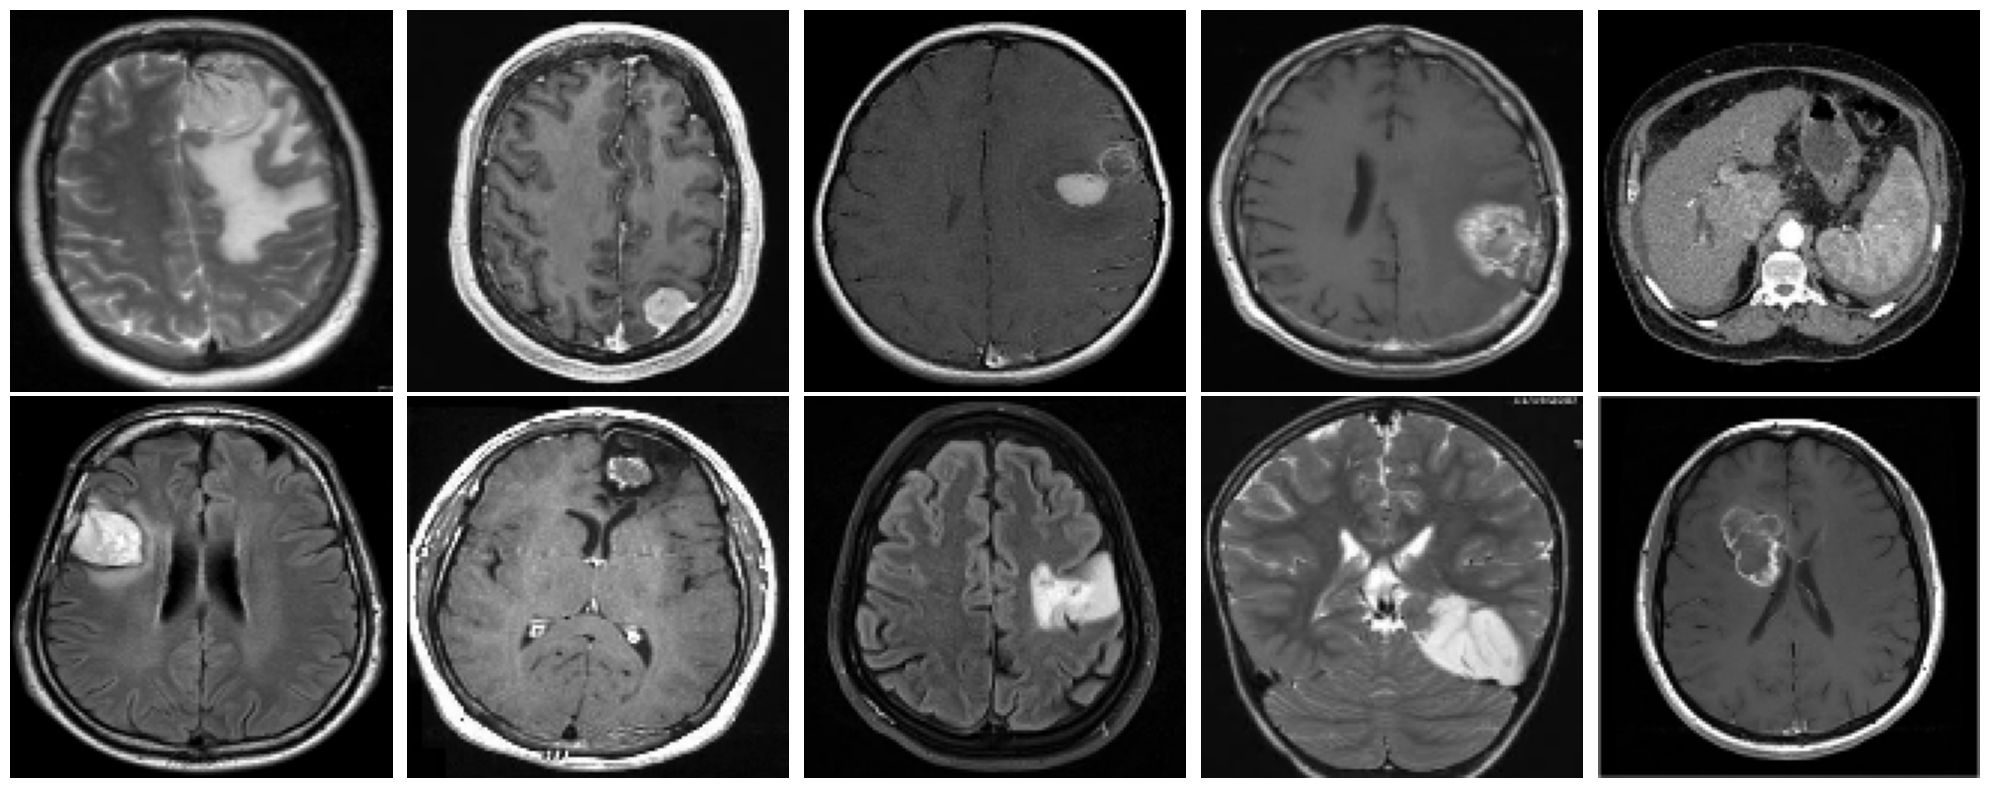

In [ ]:
# Plotting the real images:

plt.figure(figsize=(20,8))
for i in range(10):
    # Create subplots within the figure
    axs = plt.subplot(2,5,i+1)
    # Display the image in grayscale colormap
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    # Adjust subplot spacing
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

# <a id='arch'>Building the Architecture of the DC GANs:</a>

In [ ]:
def build_generator():

    """
        Generator model "generates" images using random noise. The random noise AKA Latent Vector
        is sampled from a Normal Distribution which is given as the input to the Generator. Using
        Transposed Convolution, the latent vector is transformed to produce an image
        We use 3 Conv2DTranspose layers (which help in producing an image using features; opposite
        of Convolutional Learning)

        Input: Random Noise / Latent Vector
        Output: Image
    """

    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model

This function defines a generator model for generating images from random noise. It utilizes transposed convolutional layers to transform the input latent vector into an image.

In [ ]:
def build_discriminator():

    """
        Discriminator is the model which is responsible for classifying the generated images
        as fake or real. Our end goal is to create a Generator so powerful that the Discriminator
        is unable to classify real and fake images
        A simple Convolutional Neural Network with 2 Conv2D layers connected to a Dense output layer
        Output layer activation is Sigmoid since this is a Binary Classifier

        Input: Generated / Real Image
        Output: Validity of Image (Fake or Real)

    """

    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)

    return model

This function defines a discriminator model for classifying generated images as fake or real. It consists of a simple convolutional neural network with multiple convolutional layers followed by a dense output layer with a sigmoid activation function.

# <a id='comb'>Putting the Model Together:</a>

In [ ]:
print('\n')
# Build discriminator model
discriminator = build_discriminator()
print('\n')
# Build generator model
generator = build_generator()
# Set discriminator trainable parameter to False to freeze its weights during GAN training
discriminator.trainable = False
# Define GAN input layer
gan_input = Input(shape=(NOISE_DIM,))
# Generate fake image using generator
fake_image = generator(gan_input)
# Pass fake image through discriminator
gan_output = discriminator(fake_image)
# Create GAN model
gan = Model(gan_input, gan_output, name="gan_model")
# Compile GAN model with binary crossentropy loss and specified optimizer
gan.compile(loss="binary_crossentropy", optimizer=OPTIMIZER)
# Print combined network summary
print("The Combined Network:\n")
gan.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          65,537 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 582,785 (2.22 MB)

 Trainable params: 582,785 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 262144)              │      26,476,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 64, 64, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 128, 128, 128)       │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 128, 128, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 1)         │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,265,281 (104.01 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 0 (0.00 B)

The Combined Network:



Model: "gan_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ generator (Sequential)               │ (None, 128, 128, 1)         │      27,265,281 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ discriminator (Sequential)           │ (None, 1)                   │         582,785 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,848,066 (106.23 MB)

 Trainable params: 27,265,281 (104.01 MB)

 Non-trainable params: 582,785 (2.22 MB)

This code constructs a Generative Adversarial Network (GAN) by combining the generator and discriminator models. It sets up the GAN architecture where the generator aims to produce realistic images to fool the discriminator, while the discriminator learns to distinguish between real and fake images.

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    # Generate images using generator
    generated_images = generator.predict(noise)

    # Create a figure with specified size
    plt.figure(figsize=figsize)

    # Iterate through generated images
    for i, image in enumerate(generated_images):
        # Create subplots within the figure
        plt.subplot(subplots[0], subplots[1], i+1)

        # Display grayscale or color image based on the number of channels
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')
        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))

        # Optionally save the image
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)

        # Adjust subplot spacing
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
print(type(X_train), X_train.shape)


<class 'numpy.ndarray'> (20, 128, 128, 1)


In [ ]:
import numpy as np
X_train = np.array(X_train)


In [ ]:
X_train = X_train.astype('float32')
X_train = (X_train - 127.5) / 127.5


In [ ]:
from tensorflow.keras import layers

def build_generator():
    model = keras.Sequential()
    model.add(layers.Dense(256, input_dim=NOISE_DIM))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(IMAGE_SHAPE[0] * IMAGE_SHAPE[1] * IMAGE_SHAPE[2], activation='tanh'))
    model.add(layers.Reshape(IMAGE_SHAPE))

    return model


In [ ]:
optimizer = keras.optimizers.Adam(0.0002, 0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=optimizer)


In [ ]:
from tqdm import tqdm
import numpy as np

# set random seed for reproducibility
np.random.seed(SEED)

# adjust learning rate
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001, beta_1=0.5)

# compile discriminator and GAN with the new learning rate
discriminator.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

# training parameters
EPOCHS = 100  # increased number of epochs
BATCH_SIZE = 64
NOISE_DIM = 100
STEPS_PER_EPOCH = X_train.shape[0] // BATCH_SIZE

# training loop
for epoch in range(EPOCHS):
    for batch in tqdm(range(STEPS_PER_EPOCH)):
        # generate random noise
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        # sample real images
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # combine real and fake images
        X = np.concatenate((real_X, fake_X))

        # labels for discriminator (real=0.9, fake=0)
        disc_y = np.zeros(2 * BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 0.9  # label smoothing

        # train discriminator
        d_loss = discriminator.train_on_batch(X, disc_y)

        # train generator
        y_gen = np.ones(BATCH_SIZE)  # generator tries to fool di


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, 

This function generates and displays images using the provided generator model and input noise. It arranges the generated images in a grid layout and optionally saves them to files.

This code trains the GAN model for a specified number of epochs. It generates random noise, passes it through the generator to create fake images, and combines them with real images from the training dataset. It then trains the discriminator on this combined dataset with corresponding labels indicating real or fake. Finally, it trains the GAN model to generate more realistic images by providing the generator with noise and training it to produce images that the discriminator classifies as real.

In [ ]:
np.random.seed(SEED)

for epoch in range(3):
    for batch in tqdm(range(STEPS_PER_EPOCH)):
        # Generate noise
        noise = np.random.normal(0, 1, size=(BATCH_SIZE, NOISE_DIM))

        # Generate fake images
        fake_X = generator.predict(noise)
        if np.isnan(fake_X).any():
            print("NaN detected in fake_X!")
            break

        # Sample real images
        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        # Combine real and fake images
        X = np.concatenate((real_X, fake_X))

        # Labels for discriminator (with label smoothing)
        disc_y = np.zeros(2 * BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 0.9  # Label smoothing for real images
        disc_y[BATCH_SIZE:] = 0.1  # Label smoothing for fake images

        # Train discriminator
        d_loss = discriminator.train_on_batch(X, disc_y)

        # Train generator
        y_gen = np.ones(BATCH_SIZE)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")

    # Generate sample images
    test_noise = np.random.normal(0, 1, (10, NOISE_DIM))
    sample_images(test_noise, (2, 5))

0it [00:00, ?it/s]


NameError: name 'g_loss' is not defined

# <a id='gen'>Generating some Images:</a>

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


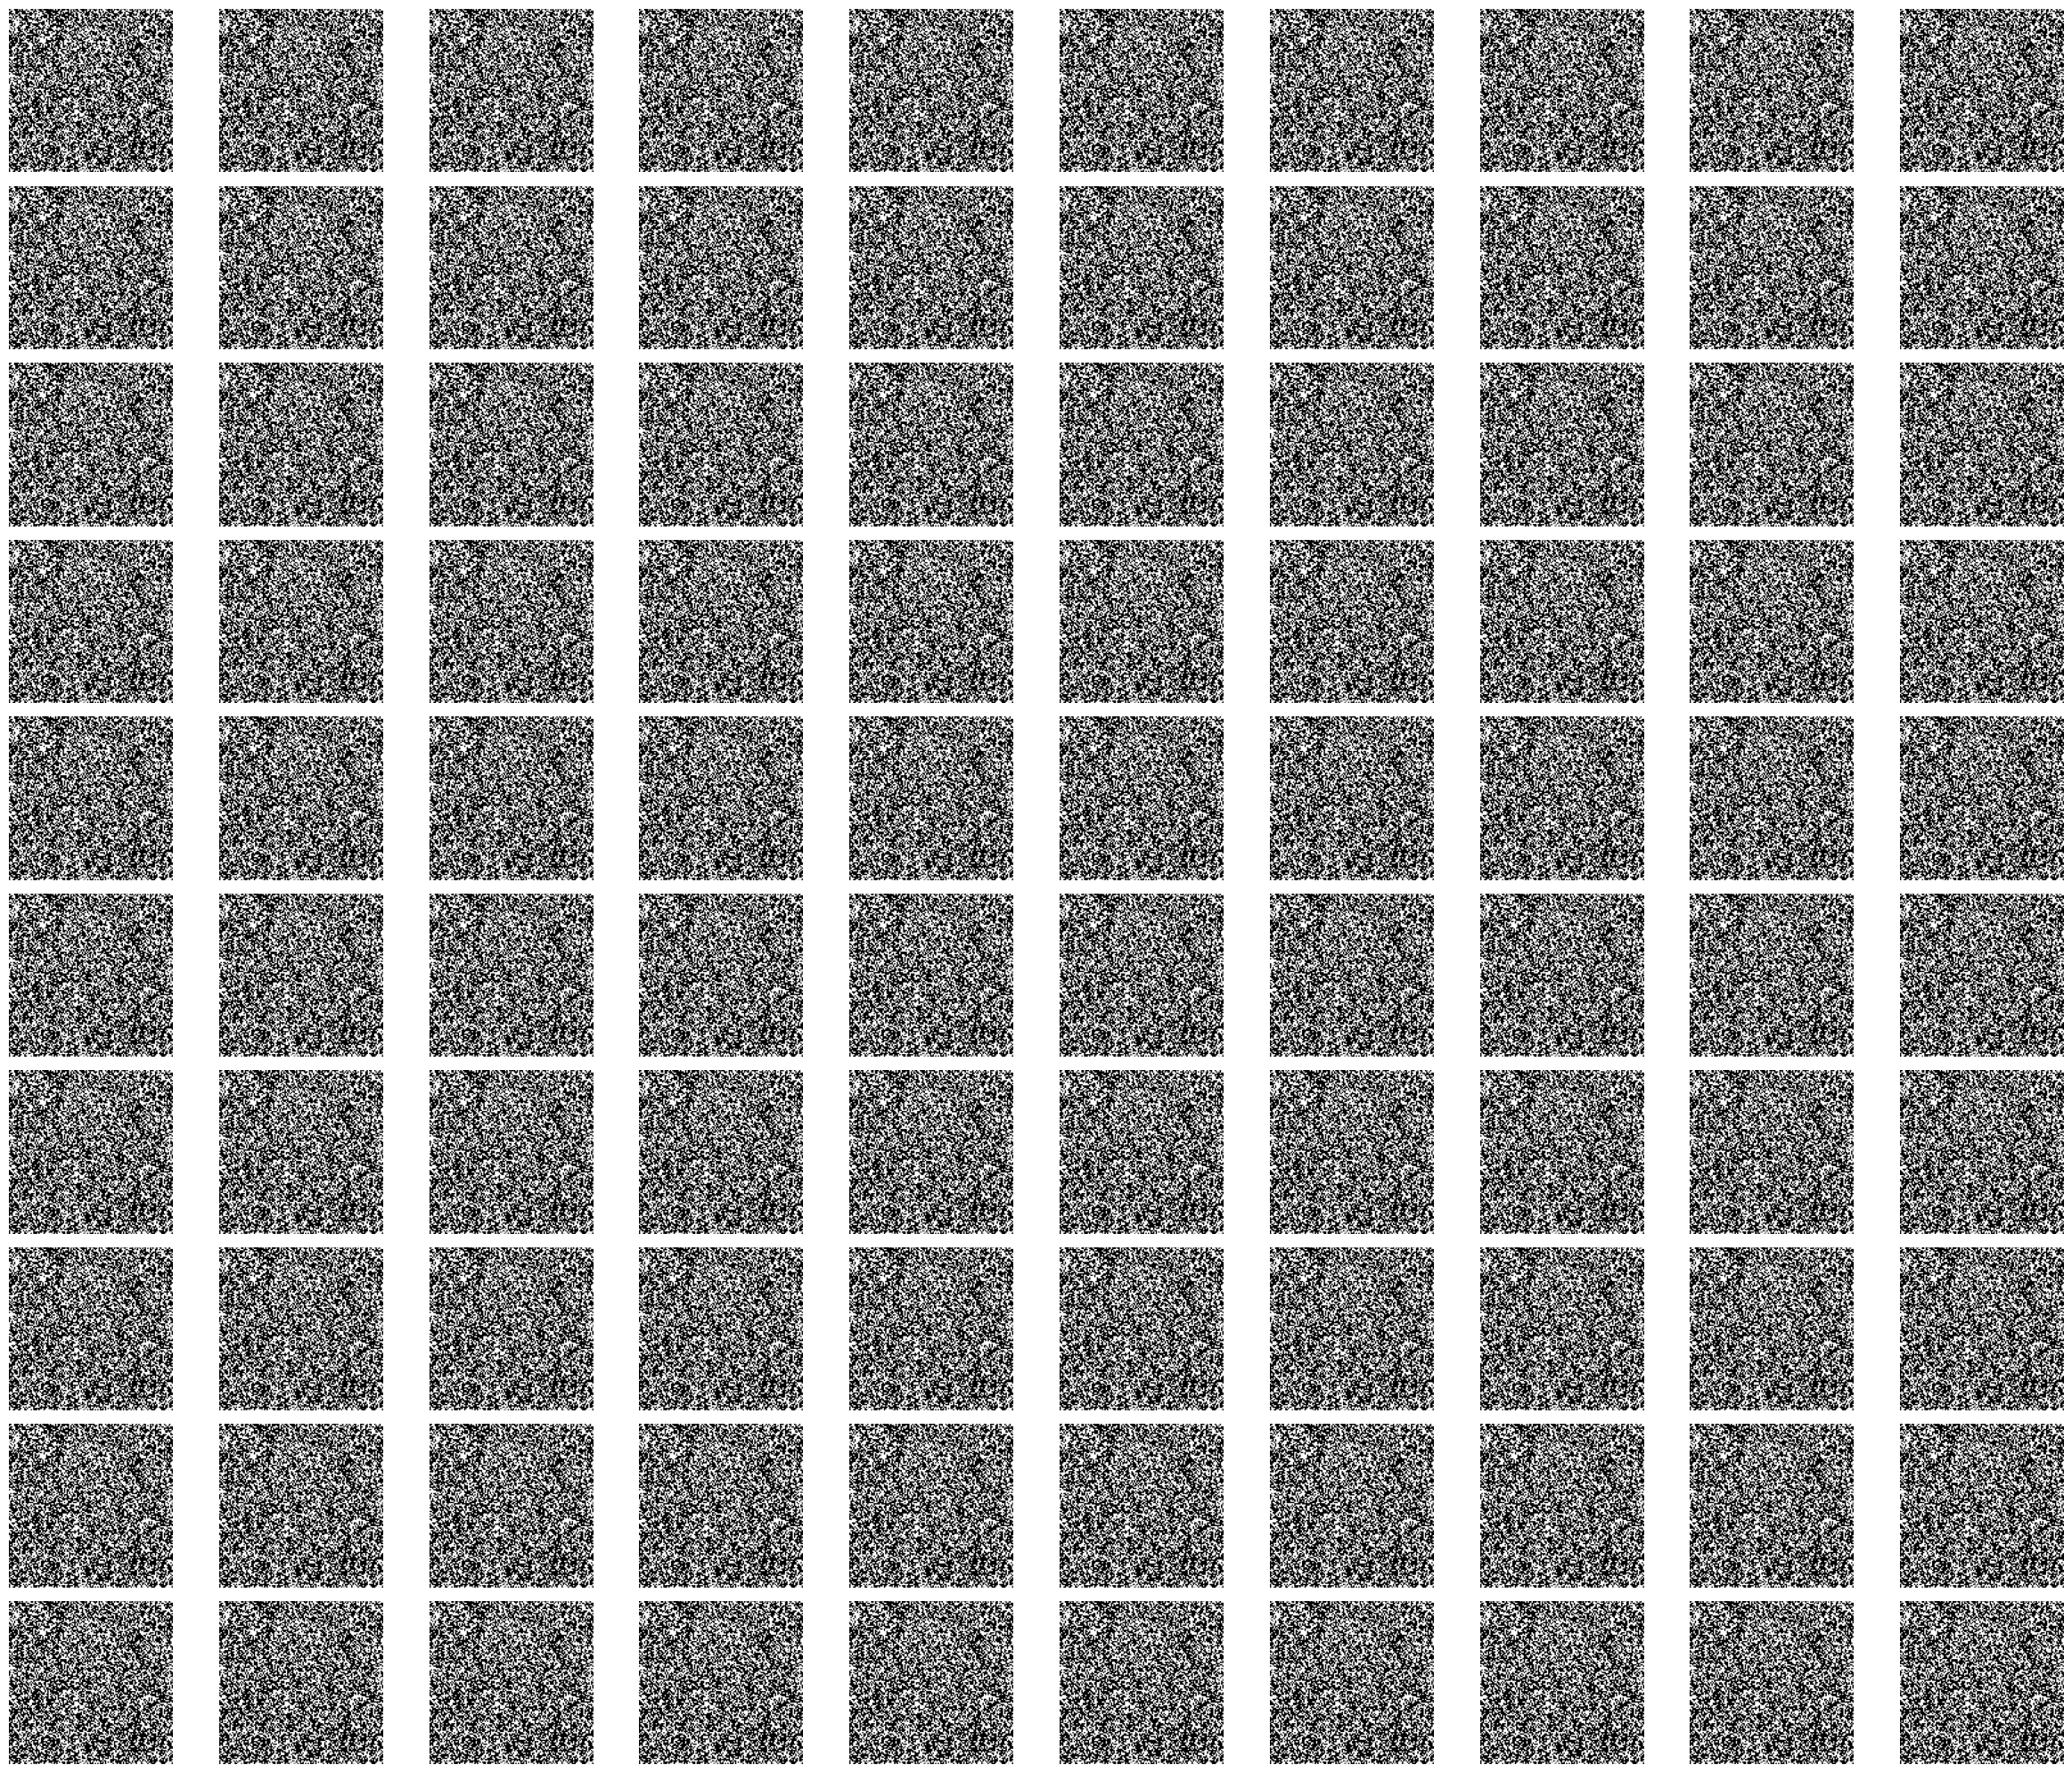

In [ ]:
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10,10), (24,20), save=True)

# <a id='plot'>Plotting the Distributions:</a>
In this test, we compare the generated images with the real samples by plotting their distributions. If the distributions overlap, that indicates the generated samples are very close to the real ones.

In [ ]:
generated_images = generator.predict(noise)
generated_images.shape

4/4 [==============================] - 0s 77ms/step


(100, 128, 128, 1)

The variable `generated_images` contains the images generated by the generator model based on the input noise. The shape of `generated_images` is `(100, WIDTH, HEIGHT, CHANNELS)`, indicating that it contains 100 images, each with dimensions specified by `WIDTH`, `HEIGHT`, and `CHANNELS`.

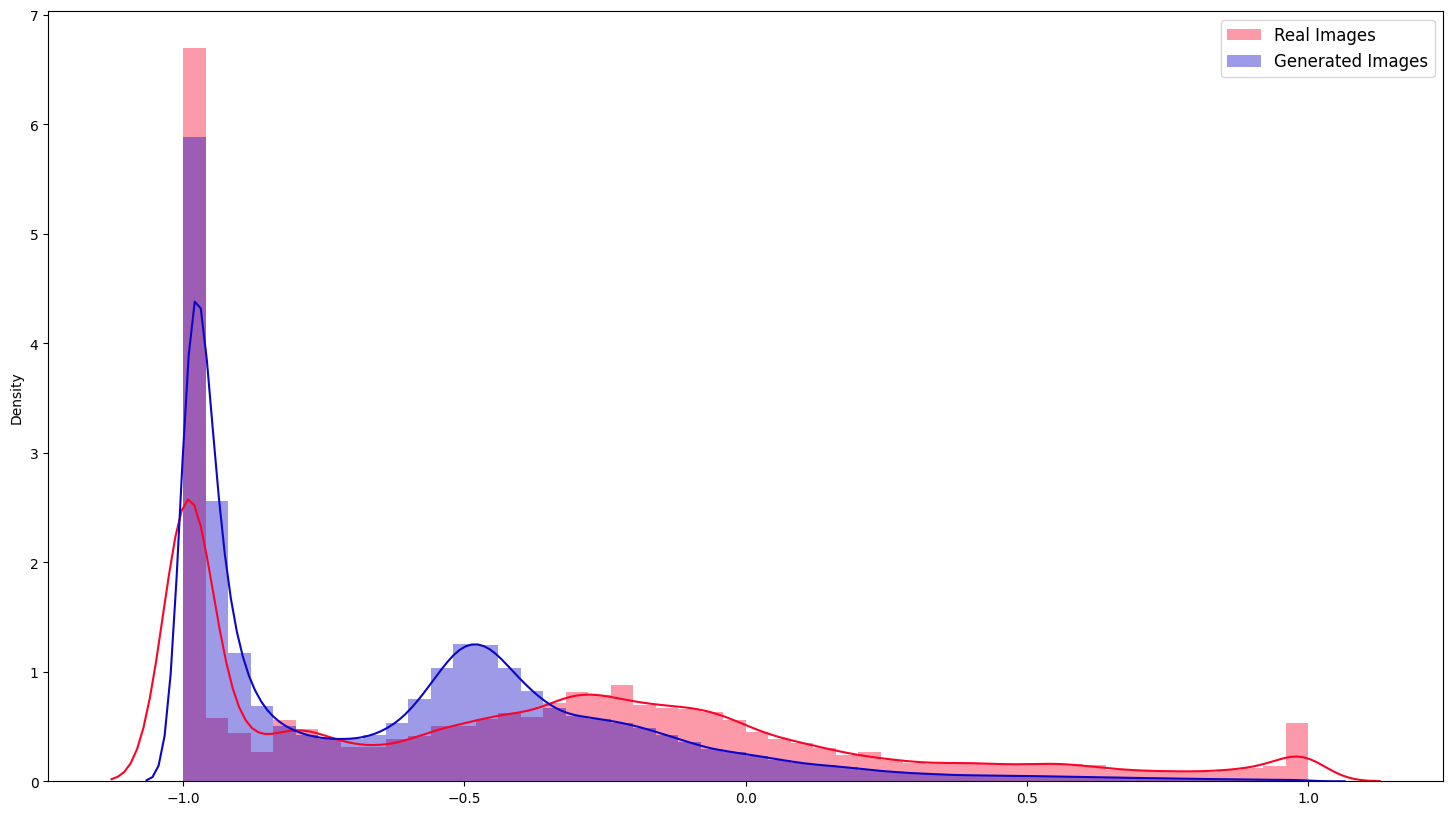

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))
sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs) # Plot distribution of pixel values for real images
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs) # Plot distribution of pixel values for generated images
axs.legend(loc='upper right', prop={'size': 12})
plt.show()

This code plots the distribution of pixel values for both real and generated images using seaborn's distplot function. It compares the distributions of pixel values in real and generated images.

# <a id='conc'>Conclusion:</a>
As we can observe from the plot above, the distribution of Generated Images is approximately the same as that of the Real Images. From this we can conclude that the generated images could be considered as a true representative of the real ones, capturing most of the variations.